In [1]:
from load_data import *
from feature_creation import *
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from model_predictions import *
from explanation import *
from income_features import *

In [2]:
consTrain, acctTrain, inflowsTrain, outflowsTrain = load_training_data()

In [24]:
XTrain, yTrain, cat_percent_model, cat_income_model = create_features(consTrain, acctTrain, inflowsTrain, outflowsTrain)

In [25]:
best_thresh_linear = evaluate_features(XTrain, yTrain, 'linear')

Best Threshold=0.42293391, Best AUC=0.824, Best Accuracy=81.35%


 n=13, Accuracy: 81.89% , AUC: 0.806
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       798
           1       0.63      0.09      0.16       185

    accuracy                           0.82       983
   macro avg       0.73      0.54      0.53       983
weighted avg       0.79      0.82      0.76       983



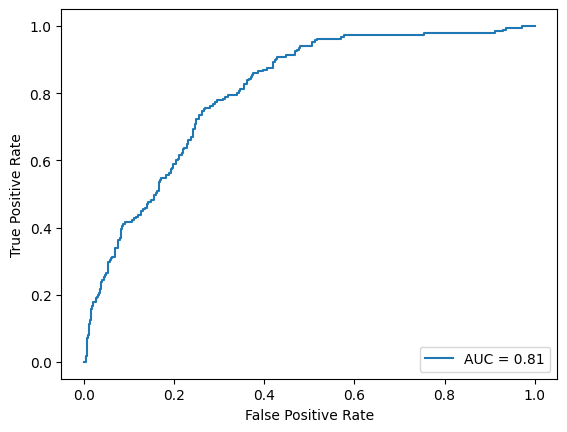

In [26]:
selection_model_linear, selection_linear = train_model(XTrain,yTrain, best_thresh_linear, 'linear')

In [27]:
best_thresh_svm = evaluate_features(XTrain, yTrain, 'svm')

Best Threshold=0.03344907, Best AUC=0.799, Best Accuracy=80.95%


 n=49, Accuracy: 81.18% , AUC: 0.794
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       798
           1       0.00      0.00      0.00       185

    accuracy                           0.81       983
   macro avg       0.41      0.50      0.45       983
weighted avg       0.66      0.81      0.73       983



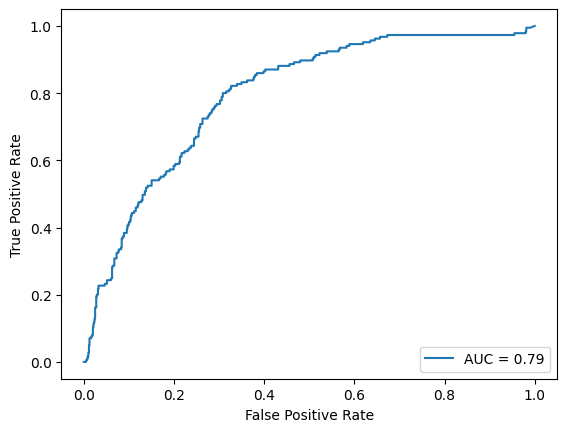

In [28]:
selection_model_svm, selection_svm = train_model(XTrain,yTrain, best_thresh_svm, 'svm')

In [29]:
best_thresh_xgb = evaluate_features(XTrain, yTrain)

Best Threshold=0.00978852, Best AUC=0.859, Best Accuracy=83.41%


 n=35, Accuracy: 83.72% , AUC: 0.867
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       798
           1       0.59      0.44      0.50       185

    accuracy                           0.84       983
   macro avg       0.73      0.68      0.70       983
weighted avg       0.82      0.84      0.83       983



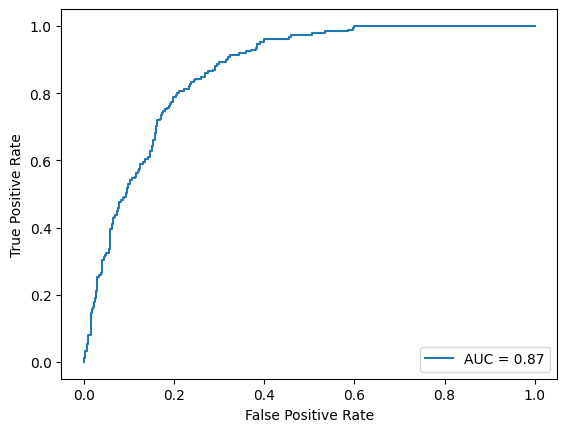

In [30]:
selection_model_xgb, selection_xgb = train_model(XTrain,yTrain, best_thresh_xgb)